In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [4]:
import GCRCatalogs

Bunch of plotting options below

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
rcParams.update({'font.size': 14})

Load the relevant catalog

In [6]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/astropy/utils/introspection.py:147: UserWarning: Module GCRCatalogs was already imported from /global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/__init__.py, but /global/u2/j/jsanch87 is being added to sys.path
  from pkg_resources import parse_version


We are going to query all halos in the simulation (by querying the centrals in the $z$ range that we care about) -- "provided you do not make any cuts on brightness or galaxy mass, there are no empty halos in the mock -- AP Hearin"

In [7]:
halo_all = gc.get_quantities(['halo_mass', 'mag_i', 'redshift', 'halo_id'], filters=['isCentral', 'redshift < 1.5'])

Now we query all galaxies within our sample ( $z < 1.5$ and $i < 24.5$)

In [8]:
galaxies = gc.get_quantities(['halo_mass', 'mag_i', 'redshift', 'halo_id', 'isCentral'], filters=['redshift < 1.5', 'mag_i < 24.5'])

In [9]:
from scipy.stats import binned_statistic, binned_statistic_2d

In [10]:
z_edges = np.array([0.15, 0.50, 0.75, 1.0, 1.5])
m_edges = np.linspace(10.4,15.6,25)

In [12]:
len(halo_all['halo_id']), len(galaxies['halo_id'])

(688998610, 40827925)

In [13]:
sys.getsizeof(halo_all['mag_i'])/1024.**3 # To get the size in GB

5.133439764380455

In [14]:
nh, me, ze = np.histogram2d(np.log10(halo_all['halo_mass']), halo_all['redshift'], bins=(m_edges, z_edges))

In [15]:
nh, me, ze

(array([[3.3808610e+06, 6.2147830e+06, 9.0945050e+06, 2.4068276e+07],
        [3.0362500e+06, 5.5475540e+06, 8.2349850e+06, 2.2100985e+07],
        [1.6676620e+06, 3.1116770e+06, 4.6961830e+06, 1.2738350e+07],
        [9.7304500e+05, 1.8202830e+06, 2.7456580e+06, 7.3509100e+06],
        [6.1113800e+05, 1.1330440e+06, 1.6932430e+06, 4.4315260e+06],
        [3.8335900e+05, 7.0278800e+05, 1.0417090e+06, 2.6627760e+06],
        [2.3892100e+05, 4.3251200e+05, 6.3104600e+05, 1.5790960e+06],
        [1.5085700e+05, 2.6861000e+05, 3.8920300e+05, 9.4619700e+05],
        [9.4244000e+04, 1.6658900e+05, 2.3725400e+05, 5.5695800e+05],
        [5.8429000e+04, 1.0070600e+05, 1.4131200e+05, 3.1625300e+05],
        [3.5945000e+04, 6.0721000e+04, 8.2405000e+04, 1.7584400e+05],
        [2.1644000e+04, 3.5417000e+04, 4.6891000e+04, 9.3795000e+04],
        [1.2900000e+04, 2.0162000e+04, 2.5843000e+04, 4.7465000e+04],
        [7.4100000e+03, 1.1276000e+04, 1.3576000e+04, 2.2575000e+04],
        [4.2220000e+

In [18]:
del halo_all # Clear the variable so we free some memory...

Get the number of centrals for the magnitude cut applied

In [28]:
#np.save('/global/projecta/projectdirs/lsst/groups/LSS/DC1/number_halos_binned_dc2.npy', (nh, me, ze)) # Save this information because it takes a long time to query!

In [16]:
unique_c, inv_c, h_counts_c = np.unique(galaxies['halo_id'][galaxies['isCentral']],return_inverse=True, return_counts=True)

In [20]:
sorted_id_c = np.argsort(galaxies['halo_id'][galaxies['isCentral']]) # This is going to help us recover the selection

Get the number of satellites for each halo

In [19]:
unique_s, inv_s, h_counts_s = np.unique(galaxies['halo_id'][~galaxies['isCentral']],return_inverse=True, return_counts=True)
sorted_id_s = np.argsort(galaxies['halo_id'][~galaxies['isCentral']])

In [21]:
is_c = galaxies['isCentral']

In [23]:
mean_count, me, ze, _ = binned_statistic_2d(np.log10(galaxies['halo_mass'][is_c][sorted_id_c]), galaxies['redshift'][is_c][sorted_id_c], h_counts_c[inv_c[sorted_id_c]], statistic='mean', bins=[m_edges, z_edges])
std_count, me, ze, _ = binned_statistic_2d(np.log10(galaxies['halo_mass'][is_c][sorted_id_c]), galaxies['redshift'][is_c][sorted_id_c], h_counts_c[inv_c[sorted_id_c]], statistic='std', bins=[m_edges, z_edges])
ncount, me, ze, _ = binned_statistic_2d(np.log10(galaxies['halo_mass'][is_c][sorted_id_c]), galaxies['redshift'][is_c][sorted_id_c], h_counts_c[inv_c[sorted_id_c]], statistic='count', bins=[m_edges, z_edges])

In [24]:
mean_count_s, me, ze, _ = binned_statistic_2d(np.log10(galaxies['halo_mass'][~is_c][sorted_id_s]), galaxies['redshift'][~is_c][sorted_id_s], h_counts_s[inv_s[sorted_id_s]], statistic='mean', bins=[m_edges, z_edges])
std_count_s, me, ze, _ = binned_statistic_2d(np.log10(galaxies['halo_mass'][~is_c][sorted_id_s]), galaxies['redshift'][~is_c][sorted_id_s], h_counts_s[inv_s[sorted_id_s]], statistic='std', bins=[m_edges, z_edges])
ncount_s, me, ze, _ = binned_statistic_2d(np.log10(galaxies['halo_mass'][~is_c][sorted_id_s]), galaxies['redshift'][~is_c][sorted_id_s], h_counts_s[inv_s[sorted_id_s]], statistic='count', bins=[m_edges, z_edges])

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


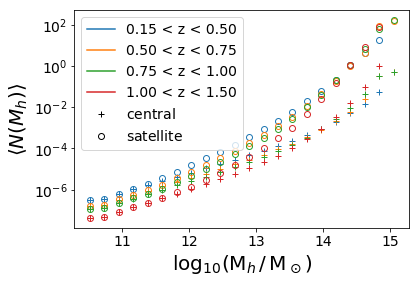

In [27]:
colors = ['C0','C1','C2','C3','C4','C5']
for i in range(mean_count.shape[1]):
    plt.errorbar(0.5*me[1:]+0.5*me[:-1], mean_count[:,i]/nh[:,i], std_count[:,i]/(nh[:,i]*np.sqrt(ncount[:,i])),linestyle='none', fmt='+', fillstyle='none', color=colors[i])
    plt.errorbar(0.5*me[1:]+0.5*me[:-1], mean_count_s[:,i]/nh[:,i], std_count_s[:,i]/(nh[:,i]*np.sqrt(ncount_s[:,i])),linestyle='none', fmt='o', fillstyle='none', color=colors[i])
    plt.plot(11,-1, label='%.2f < z < %.2f' % (ze[i], ze[i+1]))
plt.plot(11,-1,'k+', label=r'$\rm central$')
plt.plot(11,-1,'ko', fillstyle='none', label=r'$\rm satellite$')
plt.xlabel(r'$\log_{10}\left({\rm M}_h \,/\, {\rm M}_\odot\right)$', fontsize=20)
plt.ylabel(r'$\langle N(M_{h}) \rangle$', fontsize=20)
plt.yscale('log')
plt.legend(loc='best')